In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<17:09:43> Checking library dependencies ...
<17:09:43> Using the following libraries (in addition to the Anaconda libraries):
<17:09:43> 	scipy (v0.18.0)
<17:09:43> 	statsmodels (v0.6.1)
<17:09:43> 	scikit-learn (v0.17.1)
<17:09:43> 	seaborn (v0.7.1)
<17:09:43> 	rpy2 (v2.8.2)
<17:09:43> 	pandas (v0.18.1)
<17:09:43> 	matplotlib (v1.5.1)
<17:09:43> 	numpy (v1.11.1)
<17:09:43> Planted a random seed 20121020.


# Get states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
ks = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
n_clusterings = 10
filepath_prefix = 'output/ccle_hema_k_9_H_{}clustering'.format(n_clusterings)

labels, memberships, cophenetic_correlation = ccal.analyze.define_states(h, ks, n_clusterings=n_clusterings,
                                                                             filepath_prefix=filepath_prefix)

# Make Onco-GPS

In [ ]:
labels = pd.read_csv(filepath_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filepath_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

<17:09:43> Making Onco-GPS with 4 components, 166 samples, and 1 states: [0] ...
<17:09:43> '-0-' normalizing pandas object with axis=1 ...
<17:09:43> '0-1' normalizing pandas object with axis=1 ...
<17:09:43> Converting association to distance (1 - association) ...
<17:09:44> '0-1' normalizing pandas object with axis=0 ...
<17:09:44> Modeled columns by 0.017482260545828084e^(1.1271366603000295x) + 0.0005279448319646031.
<17:09:44> component_pulling_power = 2.127.
<17:09:56> '-0-' normalizing pandas object with axis=all ...


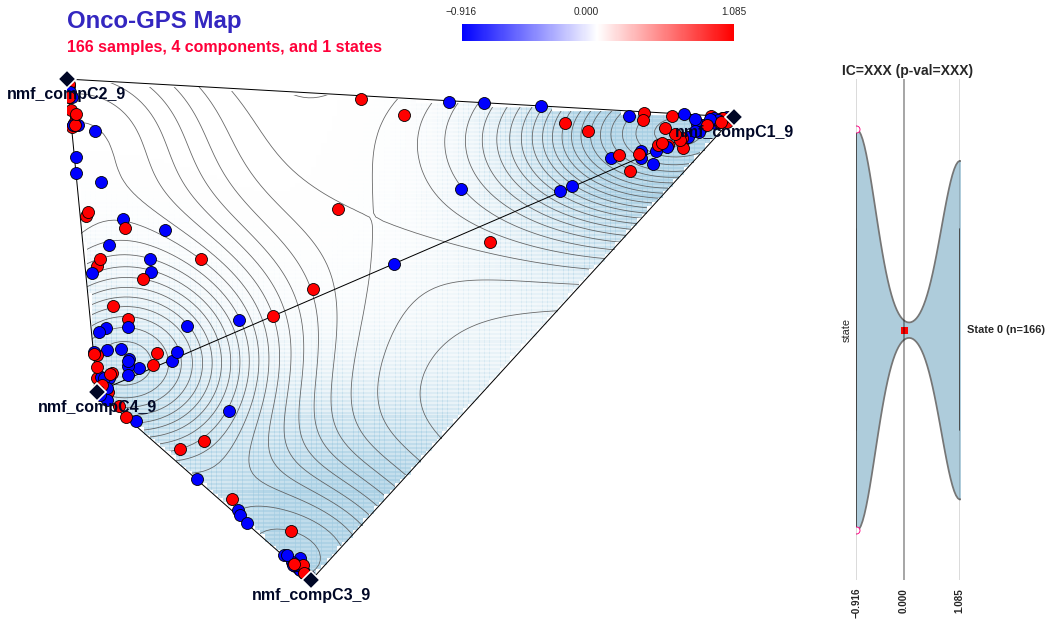

<17:10:06> Making Onco-GPS with 4 components, 166 samples, and 1 states: [0] ...
<17:10:06> '-0-' normalizing pandas object with axis=1 ...
<17:10:06> '0-1' normalizing pandas object with axis=1 ...
<17:10:06> Converting association to distance (1 - association) ...
<17:10:07> '0-1' normalizing pandas object with axis=0 ...
<17:10:07> Modeled columns by 0.017482260545828084e^(1.1271366603000295x) + 0.0005279448319646031.
<17:10:07> component_pulling_power = 2.127.


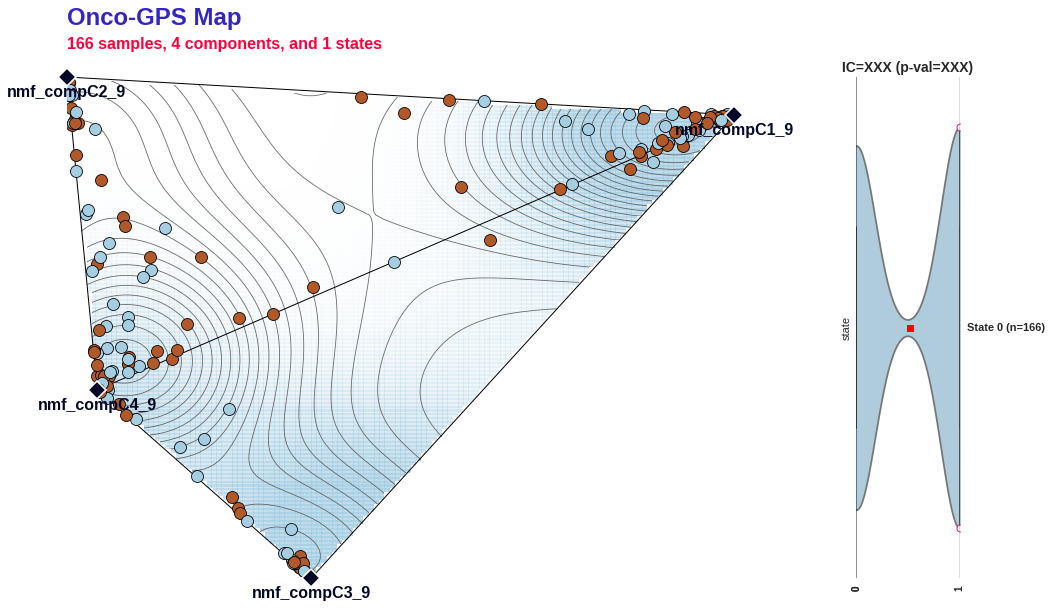

<17:10:31> Making Onco-GPS with 4 components, 166 samples, and 1 states: [0] ...
<17:10:31> '-0-' normalizing pandas object with axis=1 ...
<17:10:31> '0-1' normalizing pandas object with axis=1 ...
<17:10:31> Converting association to distance (1 - association) ...
<17:10:32> '0-1' normalizing pandas object with axis=0 ...
<17:10:32> Modeled columns by 0.017482260545828084e^(1.1271366603000295x) + 0.0005279448319646031.
<17:10:32> component_pulling_power = 2.127.


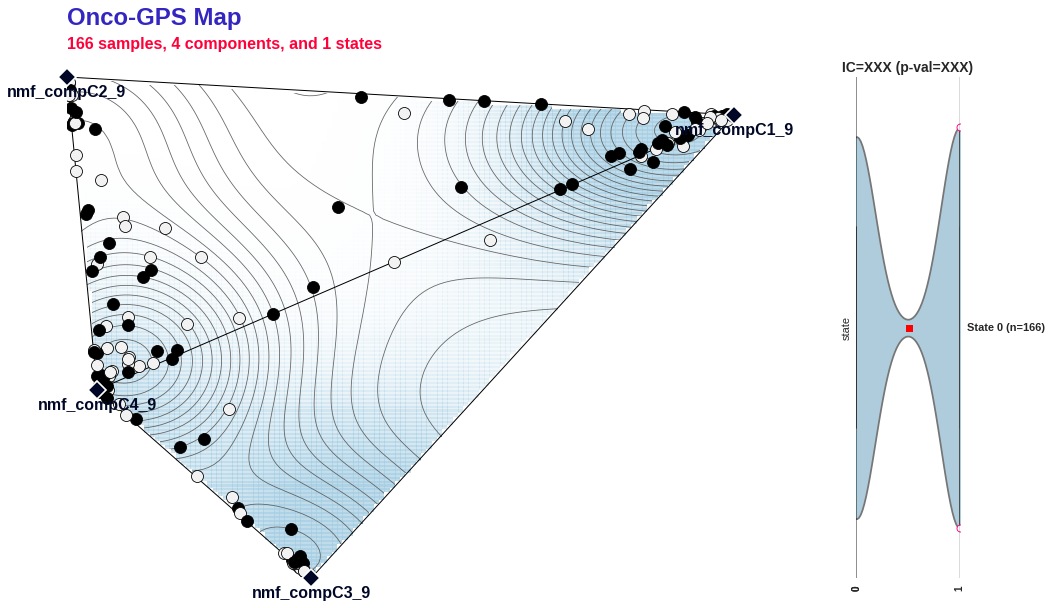

<17:10:55> Making Onco-GPS with 4 components, 166 samples, and 6 states: [0, 1, 2, 3, 4, 5] ...
<17:10:55> '-0-' normalizing pandas object with axis=1 ...
<17:10:55> '0-1' normalizing pandas object with axis=1 ...
<17:10:55> Converting association to distance (1 - association) ...
<17:10:56> '0-1' normalizing pandas object with axis=0 ...
<17:10:56> Modeled columns by 0.017482260545828084e^(1.1271366603000295x) + 0.0005279448319646031.
<17:10:56> component_pulling_power = 2.127.
<17:11:09> '-0-' normalizing pandas object with axis=all ...


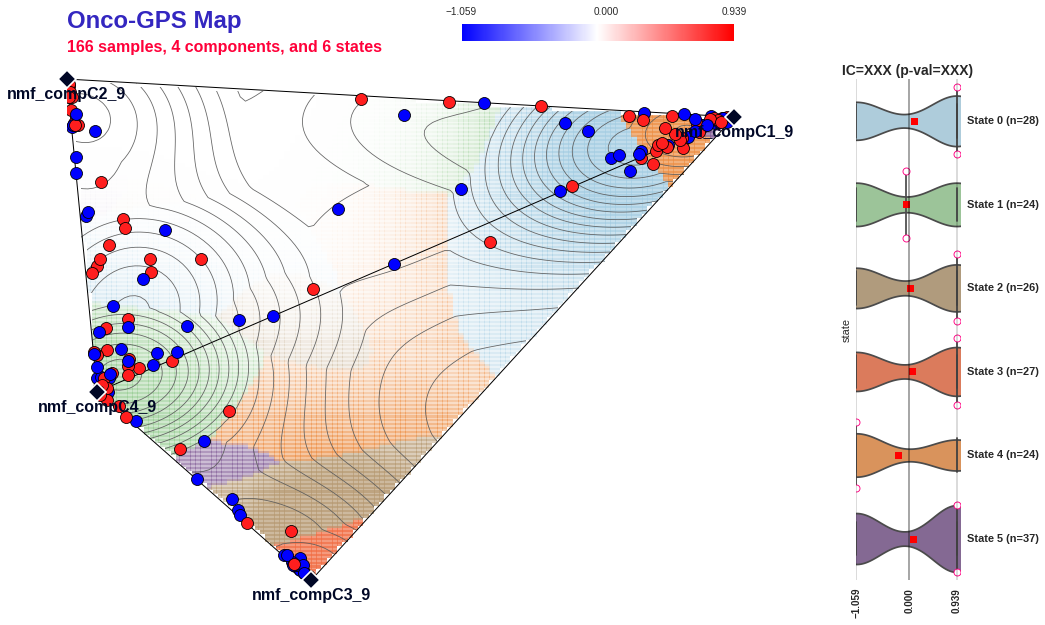

<17:11:19> Making Onco-GPS with 4 components, 166 samples, and 6 states: [0, 1, 2, 3, 4, 5] ...
<17:11:19> '-0-' normalizing pandas object with axis=1 ...
<17:11:19> '0-1' normalizing pandas object with axis=1 ...
<17:11:19> Converting association to distance (1 - association) ...
<17:11:21> '0-1' normalizing pandas object with axis=0 ...
<17:11:21> Modeled columns by 0.017482260545828084e^(1.1271366603000295x) + 0.0005279448319646031.
<17:11:21> component_pulling_power = 2.127.


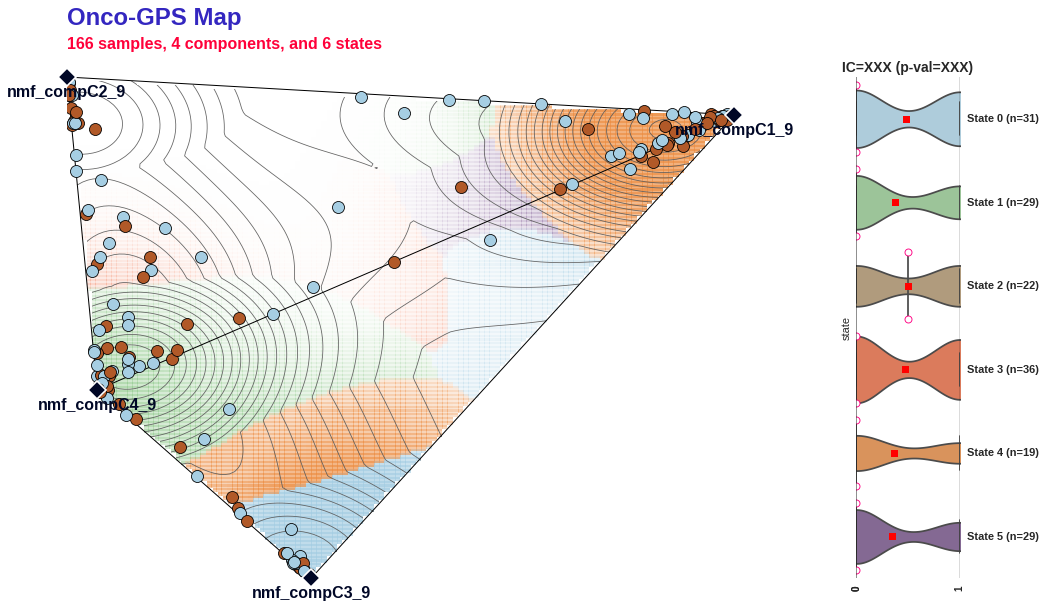

<17:11:44> Making Onco-GPS with 4 components, 166 samples, and 6 states: [0, 1, 2, 3, 4, 5] ...
<17:11:44> '-0-' normalizing pandas object with axis=1 ...
<17:11:44> '0-1' normalizing pandas object with axis=1 ...
<17:11:44> Converting association to distance (1 - association) ...
<17:11:45> '0-1' normalizing pandas object with axis=0 ...
<17:11:45> Modeled columns by 0.017482260545828084e^(1.1271366603000295x) + 0.0005279448319646031.
<17:11:45> component_pulling_power = 2.127.


In [ ]:
for n_components in range(3, min(h.shape[0], 21), 3):
    #h = ccal.support.make_random_features(n_components, 100)
    h = h.iloc[:n_components, :]
    for state in range(1, 21, 5):
        for annotation_type in ['continuous', 'categorical', 'binary']:
            ccal.onco_gps.make_map(h,
                                   np.random.choice(list(range(state)), h.shape[1]),
                                   annotations=np.random.choice(range(2), h.shape[1]),
                                   annotation_type=annotation_type)#,
                                   #background_markersize=0, background_mask_markersize=0)